In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    TFTT,
    TTFT,
    GenerousTFT,
    # GradualTFT,
    OmegaTFT,
    Davis,
    # Downing,
    # Feld,
    Grofman,
    # Grudger,
    # Joss,
    # Nydegger,
    # Shubik,
    SteinAndRapoport,
    # TidemanAndChieruzzi,
    # Tullock,
    # Pavlov
])

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, 100)
        self.layer2 = nn.Linear(100, 100)
        # self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(100, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 8
    epsilon = 0.25

    def __init__(self):
        super().__init__()

        self._learning_rate = 0.05
        self._discount_rate = 0.95
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=200,
    noise=0,
    repetitions=1,
    epochs=100,
)

[05:07:49] Commencement of training.
[05:07:53] Completed epoch 1: 1.9018873005051864
[05:07:56] Completed epoch 2: 2.025631150252593
[05:08:00] Completed epoch 3: 2.058024933501729
[05:08:03] Completed epoch 4: 2.0638312001262964
[05:08:07] Completed epoch 5: 2.0770649601010374
[05:08:11] Completed epoch 6: 2.0421374667508645
[05:08:14] Completed epoch 7: 2.054644614357884
[05:08:18] Completed epoch 8: 2.0623452875631485
[05:08:22] Completed epoch 9: 2.068855533389465
[05:08:25] Completed epoch 10: 2.0740637300505185
[05:08:29] Completed epoch 11: 2.0779272545913807
[05:08:34] Completed epoch 12: 2.083099983375432
[05:08:39] Completed epoch 13: 2.0845442154234757
[05:08:45] Completed epoch 14: 2.087277664321799
[05:08:50] Completed epoch 15: 2.091750820033679
[05:08:55] Completed epoch 16: 2.093477331281574
[05:09:00] Completed epoch 17: 2.097758076500305
[05:09:04] Completed epoch 18: 2.0967715166947327
[05:09:08] Completed epoch 19: 2.0999842000265887
[05:09:12] Completed epoch 20: 

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 139981, <Action.DEFECT: 1>: 20019}
{<Action.COOPERATE: 0>: 0.87488125, <Action.DEFECT: 1>: 0.12511875}


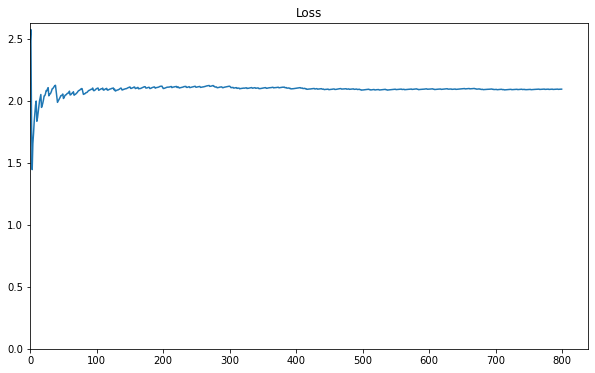

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

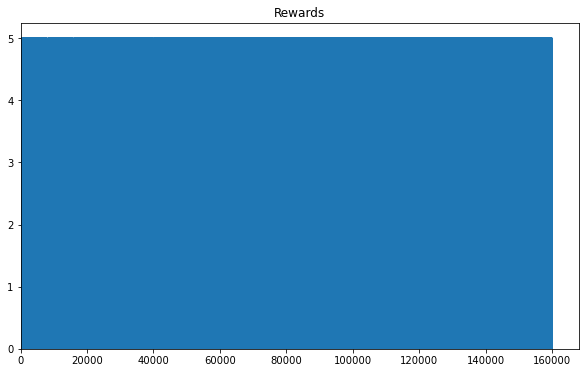

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

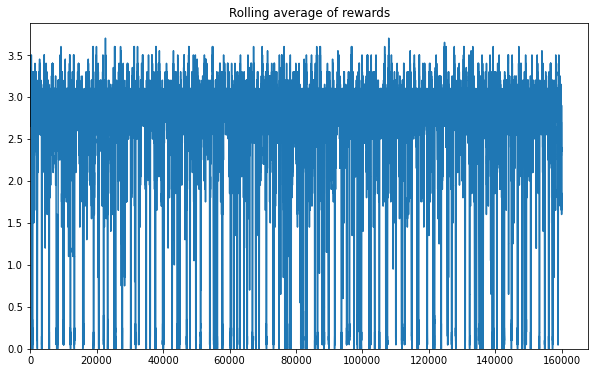

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

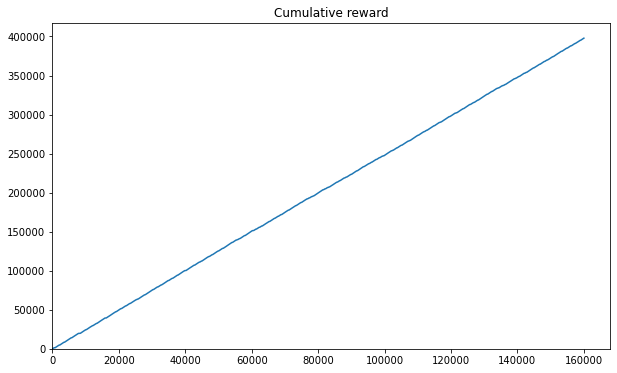

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

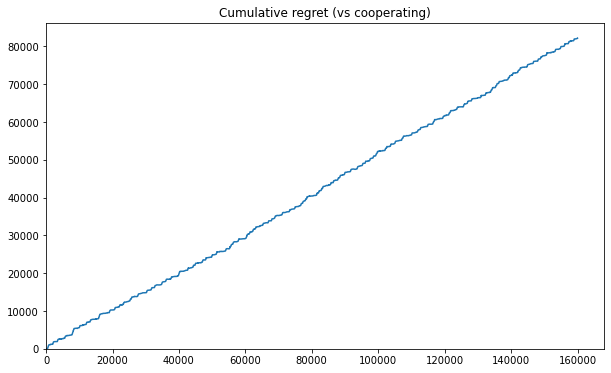

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.873125, <Action.DEFECT: 1>: 0.126875}, {<Action.COOPERATE: 0>: 0.8775, <Action.DEFECT: 1>: 0.1225}, {<Action.COOPERATE: 0>: 0.881875, <Action.DEFECT: 1>: 0.118125}, {<Action.COOPERATE: 0>: 0.868125, <Action.DEFECT: 1>: 0.131875}, {<Action.COOPERATE: 0>: 0.873125, <Action.DEFECT: 1>: 0.126875}, {<Action.COOPERATE: 0>: 0.87, <Action.DEFECT: 1>: 0.13}, {<Action.COOPERATE: 0>: 0.865, <Action.DEFECT: 1>: 0.135}, {<Action.COOPERATE: 0>: 0.869375, <Action.DEFECT: 1>: 0.130625}, {<Action.COOPERATE: 0>: 0.870625, <Action.DEFECT: 1>: 0.129375}, {<Action.COOPERATE: 0>: 0.884375, <Action.DEFECT: 1>: 0.115625}, {<Action.COOPERATE: 0>: 0.88375, <Action.DEFECT: 1>: 0.11625}, {<Action.COOPERATE: 0>: 0.878125, <Action.DEFECT: 1>: 0.121875}, {<Action.COOPERATE: 0>: 0.85375, <Action.DEFECT: 1>: 0.14625}, {<Action.COOPERATE: 0>: 0.865625, <Action.DEFECT: 1>: 0.134375}, {<Action.COOPERATE: 0>: 0.876875, <Action.DEFECT: 1>: 0.123125}, {<Action.COOPERATE: 0>: 0.870625, <Action.DEFE

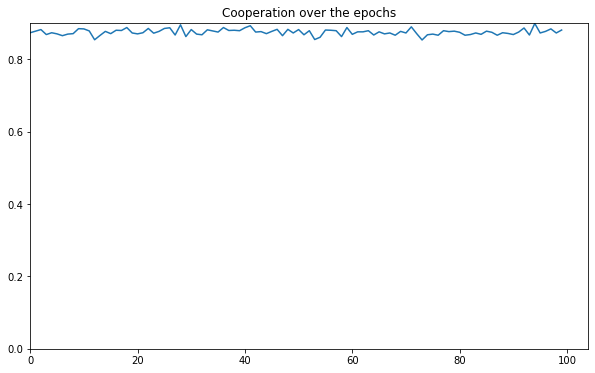

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [12]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer4): Linear(in_features=100, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [01:14<00:00, 12.94matches/s] 

SecondByBlackK83R              812                  8.877154999999997   
TTFT                           811                  6.589259            
GenerousTFT                    801                  6.746283            
Borufsen                       791                  7.155185            
Grudger                        790                  6.25724             
TFTT                           777                  5.962643999999999   
SecondByGraaskampKatzen        764                  6.308019999999999   
OmegaTFT                       761                  6.680738000000002   
GradualTFT                     761                  71.867365           
SteinAndRapoport               760                  19.803696000000006  
Pavlov                         760                  6.702096000000001   
TidemanAndChieruzzi            759                  7.888164999999999   
Champion                       752                  31.020441999999992  
SecondByTidemanAndChieruzzi    752                 